# Assignment for Principles of Data Analytics - Semester 1

The projects deals with the research question if the Gross Domestic Product (GDP) and Human Development Index (HDI) are connected to suicide rates. It could be concluded that it is highly likely that the GDP and the HDI are connected with the suicide rates at least for the examined year.

## Data
The analysis uses the dataset “Suicide Rates Overview 1985 to 2016” from Kaggle which is based on four other different datasets. 
Link to the dataset (last visited ):



In [2]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('data.csv', encoding='latin1')

In [3]:
#give out dataset head
dataset.head()

,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
# delete unnecessary columns
del dataset['sex']
del dataset['age']
del dataset['suicides/100k pop']
del dataset['generation']
del dataset[' gdp_for_year ($) ']

In [5]:
dataset.head()

,ï»¿country,year,suicides_no,population,country-year,HDI for year,gdp_per_capita ($)
0,Albania,1987,21,312900,Albania1987,NaN,796
1,Albania,1987,16,308000,Albania1987,NaN,796
2,Albania,1987,14,289700,Albania1987,NaN,796
3,Albania,1987,1,21800,Albania1987,NaN,796
4,Albania,1987,9,274300,Albania1987,NaN,796


In [6]:
#group by country-year + sum suicides
dataset.groupby('country-year')['suicides_no'].sum()

country-year
Albania1987         73
Albania1988         63
Albania1989         68
Albania1992         47
Albania1993         73
                  ... 
Uzbekistan2010    1464
Uzbekistan2011    1640
Uzbekistan2012    1835
Uzbekistan2013    1950
Uzbekistan2014    2095
Name: suicides_no, Length: 2321, dtype: int64

In [7]:
dataset['Suicides_no_total'] = dataset['suicides_no'].groupby(dataset['country-year']).transform('sum')
dataset['population_total'] = dataset['population'].groupby(dataset['country-year']).transform('sum')

In [8]:
dataset.head()

,ï»¿country,year,suicides_no,population,country-year,HDI for year,gdp_per_capita ($),Suicides_no_total,population_total
0,Albania,1987,21,312900,Albania1987,NaN,796,73,2709600
1,Albania,1987,16,308000,Albania1987,NaN,796,73,2709600
2,Albania,1987,14,289700,Albania1987,NaN,796,73,2709600
3,Albania,1987,1,21800,Albania1987,NaN,796,73,2709600
4,Albania,1987,9,274300,Albania1987,NaN,796,73,2709600


In [9]:
del dataset['suicides_no']
del dataset['population']

In [10]:
dataset.head()

,ï»¿country,year,country-year,HDI for year,gdp_per_capita ($),Suicides_no_total,population_total
0,Albania,1987,Albania1987,NaN,796,73,2709600
1,Albania,1987,Albania1987,NaN,796,73,2709600
2,Albania,1987,Albania1987,NaN,796,73,2709600
3,Albania,1987,Albania1987,NaN,796,73,2709600
4,Albania,1987,Albania1987,NaN,796,73,2709600


In [11]:
#drop rows if NaN is empty
dataset.dropna(subset = ["HDI for year"], inplace=True)

In [12]:
dataset.head()

,ï»¿country,year,country-year,HDI for year,gdp_per_capita ($),Suicides_no_total,population_total
72,Albania,1995,Albania1995,0.619,835,88,2903400
73,Albania,1995,Albania1995,0.619,835,88,2903400
74,Albania,1995,Albania1995,0.619,835,88,2903400
75,Albania,1995,Albania1995,0.619,835,88,2903400
76,Albania,1995,Albania1995,0.619,835,88,2903400


In [13]:
#only get rows with unique values
new_df = dataset.drop_duplicates()

In [14]:
dataset.head()

,ï»¿country,year,country-year,HDI for year,gdp_per_capita ($),Suicides_no_total,population_total
72,Albania,1995,Albania1995,0.619,835,88,2903400
73,Albania,1995,Albania1995,0.619,835,88,2903400
74,Albania,1995,Albania1995,0.619,835,88,2903400
75,Albania,1995,Albania1995,0.619,835,88,2903400
76,Albania,1995,Albania1995,0.619,835,88,2903400


In [15]:
new_df.head()

,ï»¿country,year,country-year,HDI for year,gdp_per_capita ($),Suicides_no_total,population_total
72,Albania,1995,Albania1995,0.619,835,88,2903400
132,Albania,2000,Albania2000,0.656,1299,54,2796300
192,Albania,2005,Albania2005,0.695,2931,0,2783320
252,Albania,2010,Albania2010,0.722,4359,96,2736025
540,Antigua and Barbuda,2012,Antigua and Barbuda2012,0.781,13657,0,88703


In [16]:
new_df.nunique()

ï»¿country             90
year                   10
country-year          697
HDI for year          305
gdp_per_capita ($)    692
Suicides_no_total     557
population_total      696
dtype: int64

In [17]:
new_df.loc[new_df['year'] == 2014]

,ï»¿country,year,country-year,HDI for year,gdp_per_capita ($),Suicides_no_total,population_total
564,Antigua and Barbuda,2014,Antigua and Barbuda2014,0.783,14093,0,90837
936,Argentina,2014,Argentina2014,0.836,13400,3231,39276555
1224,Armenia,2014,Armenia2014,0.733,4142,58,2803029
1762,Australia,2014,Australia2014,0.935,66809,2891,21927587
2134,Austria,2014,Austria2014,0.885,54278,1314,8141165
...,...,...,...,...,...,...,...
26380,Ukraine,2014,Ukraine2014,0.747,3299,7968,40464165
26824,United Kingdom,2014,United Kingdom2014,0.907,49906,4788,60570482
27196,United States,2014,United States2014,0.915,58531,42769,297749735
27532,Uruguay,2014,Uruguay2014,0.793,18012,591,3177645


In [18]:
new_df['suicide rate'] = new_df['Suicides_no_total']/new_df['population_total']

/Users/catja/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
new_df.head()

,ï»¿country,year,country-year,HDI for year,gdp_per_capita ($),Suicides_no_total,population_total,suicide rate
72,Albania,1995,Albania1995,0.619,835,88,2903400,0.000030
132,Albania,2000,Albania2000,0.656,1299,54,2796300,0.000019
192,Albania,2005,Albania2005,0.695,2931,0,2783320,0.000000
252,Albania,2010,Albania2010,0.722,4359,96,2736025,0.000035
540,Antigua and Barbuda,2012,Antigua and Barbuda2012,0.781,13657,0,88703,0.000000


In [20]:
df_2014 = new_df.loc[new_df['year'] == 2014]
df_2014.head()

,ï»¿country,year,country-year,HDI for year,gdp_per_capita ($),Suicides_no_total,population_total,suicide rate
564,Antigua and Barbuda,2014,Antigua and Barbuda2014,0.783,14093,0,90837,0.000000
936,Argentina,2014,Argentina2014,0.836,13400,3231,39276555,0.000082
1224,Armenia,2014,Armenia2014,0.733,4142,58,2803029,0.000021
1762,Australia,2014,Australia2014,0.935,66809,2891,21927587,0.000132
2134,Austria,2014,Austria2014,0.885,54278,1314,8141165,0.000161


In [21]:
del df_2014['ï»¿country']
del df_2014['year']
del df_2014['country-year']
del df_2014['HDI for year']
del df_2014['Suicides_no_total']
del df_2014['population_total']

In [22]:
df_2014.head()

,gdp_per_capita ($),suicide rate
564,14093,0.000000
936,13400,0.000082
1224,4142,0.000021
1762,66809,0.000132
2134,54278,0.000161


## Prepare Data for Simple Linear Regression

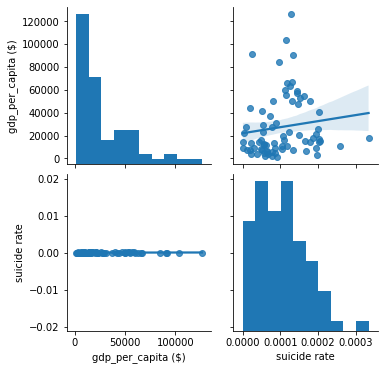

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Make a pair plot from the seaborn package
import seaborn as sea 
sea.pairplot(df_2014, kind = "reg")
plt.show()

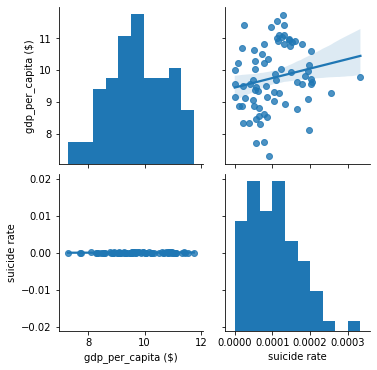

In [24]:
# data is skewed, so log transformation
#Transform both varaibles to log
df_2014_log = pd.DataFrame()
#We perform a log(x+1) tranformation since values of 0 would give inf
df_2014_log[["gdp_per_capita ($)"]] = np.log(df_2014[["gdp_per_capita ($)"]]+1)
df_2014_log[["suicide rate"]] = np.log(df_2014[["suicide rate"]]+1)

#Build the seaborn plot again
sea.pairplot(df_2014_log, kind = "reg")
plt.show()

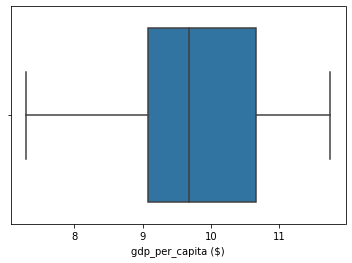

In [84]:
#get outliers
sea.boxplot(x=df_2014_log["gdp_per_capita ($)"])


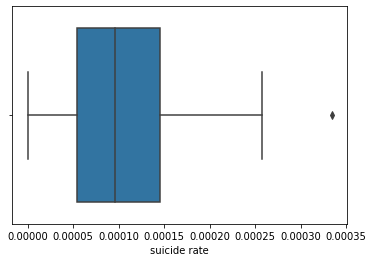

In [85]:
sea.boxplot(x=df_2014_log["suicide rate"])